In [2]:
import matplotlib.pyplot as plt
import numpy as np
from kshape.core_gpu import kshape as ks_gpu
import joblib
import pandas as pd
import seaborn as sns

plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from matplotlib.ticker import FuncFormatter, MaxNLocator

In [3]:
columnnameen = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
                'NOx',
                'O$_3$',
                'PM$_1$',
                'SO$_2$',
                'Radiation',
                'Temperature',
                'Humidity',
                'TICCLabel',
                'Month',
                'KMeansLabel']
columnname = [
   'Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene',
    'NOx',
    'O3',
    'PM1',
    'SO2',
    'Radiation',
    'Temperature',
    'Humidity',
    'TICCLabel',
    "Place",
    'Month',
    'KMeansLabel'
]

Xcolname=[   'NOx',
    f'O$_3$',
    f'SO$_2$',
    'Radiation',
    'Temperature',
    'Humidity',
            ]

Tname = ['Isoprene',
    '1,3-Butadiene',
    'Butene',
    'Pentene']
yname = ['PM1']
Xname = ['NOx',
         'O3',
         'SO2',
         'Radiation',
         'Temperature',
         'Humidity', ]
Wname = ["Place",
         'Month',
         'KMeansLabel']

In [3]:
# Reload the data
datacluster = pd.read_excel("dataDMLnoscale.xlsx", index_col=0)

In [4]:
datacluster.columns=columnname

In [20]:
datacluster

,Isoprene,"1,3-Butadiene",Butene,Pentene,NOx,O3,PM1,SO2,Radiation,Temperature,Humidity,TICCLabel,Place,Month,KMeansLabel
0,0.824809,1.023420,6.039046e-02,1.020860,10.398318,37.210485,12.171348,3.061825,56.636985,36.724194,52.584619,0,jh,Aug,2
1,0.824966,1.023651,6.040172e-02,1.020763,10.398269,37.210187,12.171461,3.061805,56.642700,36.724215,52.584563,0,jh,Aug,2
2,0.825225,1.024082,6.042065e-02,1.020372,10.398206,37.209573,12.171639,3.061767,56.654085,36.724259,52.584452,0,jh,Aug,2
3,0.825264,1.024721,6.045804e-02,1.019937,10.398165,37.208622,12.171892,3.061712,56.671141,36.724324,52.584286,0,jh,Aug,2
4,0.824389,1.025512,6.051097e-02,1.019362,10.398151,37.207335,12.172202,3.061642,56.693861,36.724411,52.584064,0,jh,Aug,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76353,0.069446,0.016855,2.216370e-08,0.004844,8.495156,15.707872,7.337394,1.558032,2.717827,36.618016,68.353371,1,cm,Jul,0
76354,0.069386,0.016841,1.394885e-08,0.004841,8.495056,15.708468,7.337082,1.557816,2.717821,36.618026,68.353238,1,cm,Jul,0
76355,0.069327,0.016831,2.214623e-08,0.004839,8.494978,15.708930,7.336853,1.557647,2.717818,36.618033,68.353173,1,cm,Jul,0
76356,0.069282,0.016825,1.394903e-08,0.004839,8.494924,15.709247,7.336680,1.557531,2.717815,36.618039,68.353152,1,cm,Jul,0


In [17]:
# Calculate descriptive statistics for the numeric columns
desc_stats = datacluster.describe(percentiles=[.25, .5, .75])

# Transpose the dataframe for better visualization
desc_stats = desc_stats.T

# Drop the "count" row since it's not part of the requested statistics
desc_stats = desc_stats.drop(columns=["count"])

# Rename the columns to more intuitive names
desc_stats.columns = ["Mean", "STD", "Min", "25th Percentile", "Median", "75th Percentile", "Max"]

desc_stats

,Mean,STD,Min,25th Percentile,Median,75th Percentile,Max
Isoprene,1.303875,1.653475,-2.067626e-08,9.261733e-05,2.525636e-01,2.807061,8.488887
"1,3-Butadiene",1.057306,1.277648,-2.392287e-08,2.560882e-06,2.296722e-01,2.329825,6.448773
Butene,0.414060,1.149688,-1.117816e-08,-3.826886e-09,4.093480e-09,0.071019,9.122366
Pentene,0.317937,0.797992,-6.559197e-09,1.004247e-06,3.786971e-02,0.206980,10.683054
NOx,8.051268,5.932570,-3.645418e-01,4.468728e+00,7.625871e+00,9.806941,47.965754
O3,18.548379,16.812978,-2.860843e+00,4.198222e+00,1.408175e+01,29.424385,62.086498
PM1,18.171678,14.935061,2.718374e+00,6.931571e+00,1.375697e+01,24.027991,86.988235
SO2,4.325584,2.095193,1.465171e+00,2.547056e+00,4.275127e+00,5.591295,8.234185
Radiation,13.396135,36.428132,-4.190297e+00,-1.439648e-01,6.960341e-01,7.113492,428.897594
Temperature,31.429444,3.577734,2.424566e+01,2.909349e+01,3.066915e+01,33.603494,40.009099


In [19]:
# Save the descriptive statistics dataframe to an Excel file
excel_path = "descriptive_statistics_table.xlsx"
desc_stats.to_excel(excel_path)
excel_path

'descriptive_statistics_table.xlsx'

In [ ]:
namel=["GNR ($W/m^2$)", "Temperature ($°C$)", "PM2.5 ($μg/m^3$)", "PM1 ($μg/m^3$)", "Humidity ($%rh$)", "O$_3$ ($ppm$)", "NO ($ppm$)", "SO$_2$ ($ppm$)", "NO$_2$ ($ppm$)", "Isoprene ($μg/m^3$)"]

In [28]:
import os
numeric_cols = datacluster.columns[0:-4]

# Function to replace outliers with mean
def replace_outliers_with_mean(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column_name].mean()
    df[column_name] = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound), mean_value, df[column_name])
    return df

# Apply the function to the dataframe for each numeric column
for col in numeric_cols:
    datacluster = replace_outliers_with_mean(datacluster, col)



# Create a directory to save the plots
output_dir = "kdensity_plots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the Morandi colors
morandi_colors = ['#003366', '#006400', '#8B0000', '#4B0082', '#FF4500', '#8B4513']

# Plot kdensity for each numeric column and save
for idx, col in enumerate(numeric_cols):
    fig, ax = plt.subplots(figsize=(5, 1))

    sns.kdeplot(datacluster [col], ax=ax, fill=True, color=morandi_colors[idx % len(morandi_colors)])

    # Format the plot based on requirements
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_facecolor('none')
    fig.set_facecolor('none')

    # Set xtick precision and size
    ax.tick_params(axis='x', labelsize=16)
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{x:.2f}" for x in xticks])

    # Save the plot
    file_path = os.path.join(output_dir, f"{col}_kdensity.png")
    fig.savefig(file_path, bbox_inches='tight', transparent=True)
    plt.close(fig)

output_dir

'kdensity_plots'

In [27]:
# Modified code to generate LaTeX formula enclosed with $$
summary_data = pd.read_excel("modified_summary.xlsx")

# Extracting coefficient names (Xname and Tname) and corresponding point estimates
coefficient_names = summary_data['Name'].str.split("|", expand=True)
Xnames = coefficient_names[0]
Tnames = coefficient_names[1]
unique_Tnames = Tnames.unique()
point_estimates = summary_data['point_estimate'].values

# Function to convert * symbols to LaTeX superscript format
def convert_to_superscript(value):
    if '*' in value:
        value = value.replace('*', '^*').replace('**', '^{\ast\ast}').replace('***', '^{\ast\ast\ast}')
    return value

# Apply the function to point_estimates
point_estimates = [convert_to_superscript(str(val)) for val in point_estimates]


# Generating the LaTeX code for each theta_i(X) equation
theta_expressions_dict = {}
for tname in unique_Tnames:
    theta_expressions = []
    for xname, theta, point_estimate in zip(Xnames, Tnames, point_estimates):
        if theta == tname:
            if xname == "Intercept":
                theta_expression = fr"{point_estimate}"
            else:
                theta_expression = fr"{point_estimate} \{xname} "
            theta_expressions.append(theta_expression)

    # Combine all theta expressions related to a specific Tname
    theta_expressions_dict[tname] = " + ".join(theta_expressions)

theta_expressions_dict

{'Isoprene': '0.059 \\NOx  + 0.185^*^*^* \\O3  + -0.1^*^* \\SO2  + -0.004 \\Radiation  + -0.03 \\Temperature  + 0.185^*^*^* \\Humidity  + 0.203^*^*^*',
 '1,3-Butadiene': '-0.133^*^* \\NOx  + 0.491^*^*^* \\O3  + -0.214^*^*^* \\SO2  + 0.021 \\Radiation  + -0.009 \\Temperature  + 0.581^*^*^* \\Humidity  + 0.585^*^*^*',
 'Butene': '0.356^*^*^* \\NOx  + -0.501^*^*^* \\O3  + 0.047^*^* \\SO2  + 0.511^*^*^* \\Radiation  + 0.403^*^*^* \\Temperature  + 0.655^*^*^* \\Humidity  + 0.401^*^*^*',
 'Pentene': '0.072^*^* \\NOx  + -0.003 \\O3  + -0.071^*^*^* \\SO2  + 0.188^*^*^* \\Radiation  + 0.144^*^*^* \\Temperature  + 0.269^*^*^* \\Humidity  + 0.144^*^*^*'}

In [4]:
import pickle

with open('bayes_search_results_y.pkl', 'rb') as file:
    bayes_search_results_y = pickle.load(file)
with open('bayes_search_results_t.pkl', 'rb') as file:
    bayes_search_results_t = pickle.load(file)
with open('mse_results.pkl', 'rb') as file:
    mse_results = pickle.load(file)
# 找到最佳模型的名称和实例
best_model_y_name = min((k for k in mse_results if 'model_y' in mse_results[k]),
                        key=lambda k: mse_results[k]['model_y'])
best_model_t_name = min((k for k in mse_results if 'model_t' in mse_results[k]),
                        key=lambda k: mse_results[k]['model_t'])

best_model_y = bayes_search_results_y[best_model_y_name].best_estimator_
best_model_t = bayes_search_results_t[best_model_t_name].best_estimator_

print(f"Best model_y name: {best_model_y_name}")
print(f"Best model_t name: {best_model_t_name}")
print("Best model_y instance:", best_model_y)
print("Best model_t instance:", best_model_t)

Best model_y name: GradientBoostingRegressor
Best model_t name: GradientBoostingRegressor
Best model_y instance: Pipeline(steps=[('model',
                 GradientBoostingRegressor(learning_rate=0.10422385851639915,
                                           max_depth=8, max_features='sqrt',
                                           n_estimators=500, subsample=0.5))])
Best model_t instance: Pipeline(steps=[('model',
                 MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.07007568334197407,
                                                                          max_depth=8,
                                                                          max_features='sqrt',
                                                                          n_estimators=500,
                                                                          subsample=0.5351680873953943)))])


In [5]:
# Reload the data
data= pd.read_excel("dataDMLnoscale.xlsx", index_col=0)

In [6]:
data.columns=columnname
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# data=grouped_data
# data.columns=columnname
X = data[Xname]
T = data[Tname]
y = np.array(data[yname]).ravel()
Dummy = [pd.get_dummies(data[i], prefix=i, drop_first=True) for i in Wname]
W = pd.concat([Dummy[0], Dummy[1], Dummy[2]], axis=1)
# Combine W with X for predictions
X_combined = pd.concat([X, W], axis=1)
X_train_combined, X_test_combined, y_train, y_test, T_train, T_test = train_test_split(X_combined, y, T, test_size=0.2,
                                                                                       random_state=42)


# Define the columns that need to be standardized
columns_to_scale = Xname

# Separate out the parts of X_combined that need to be standardized
X_to_scale = X_train_combined[columns_to_scale]
X_test_to_scale = X_test_combined[columns_to_scale]

# Initialize the scaler and fit it to the training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_to_scale)
X_test_scaled = scaler.transform(X_test_to_scale)

# Convert scaled arrays back to DataFrame for concatenation
X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale, index=X_to_scale.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test_to_scale.index)

# Replace the original columns in X_combined with the scaled ones
X_train_combined[columns_to_scale] = X_scaled_df
X_test_combined[columns_to_scale] = X_test_scaled_df

In [41]:
model = best_model_t
predicted_treatment = model.predict(X_train_combined)

gps_scores = {}
for tname in Tname:
    model = best_model_t_name

    # Step 3: Calculate GPS
    gps = T_train.iloc[:,Tname.index(tname)] - predicted_treatment[:,Tname.index(tname)]
    gps_scores[tname] = gps

<AxesSubplot: ylabel='Density'>

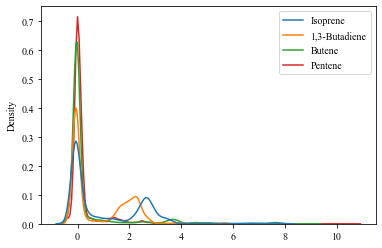

In [13]:
sns.kdeplot(gps_scores)

<Figure size 432x432 with 0 Axes>

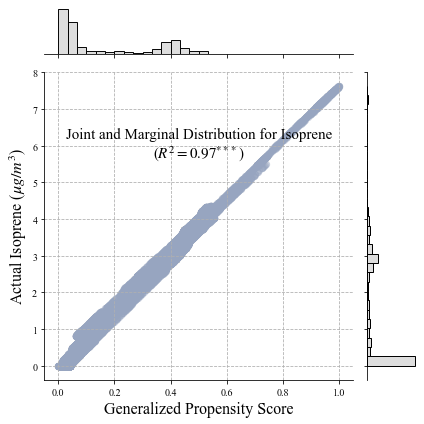

<Figure size 432x432 with 0 Axes>

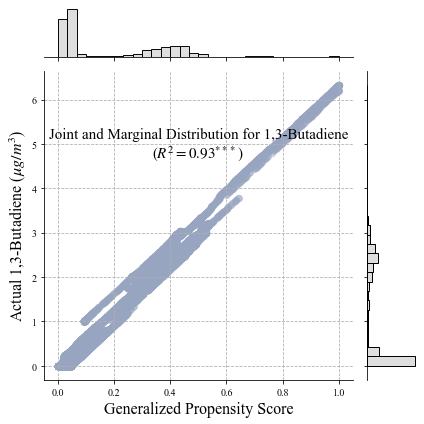

<Figure size 432x432 with 0 Axes>

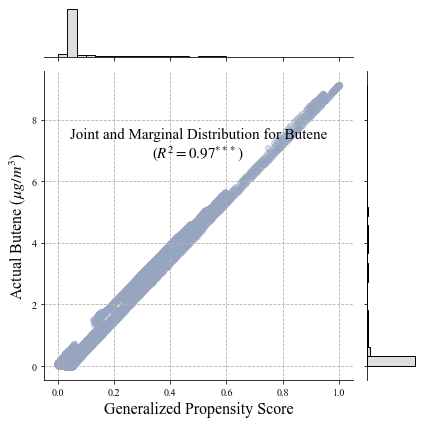

<Figure size 432x432 with 0 Axes>

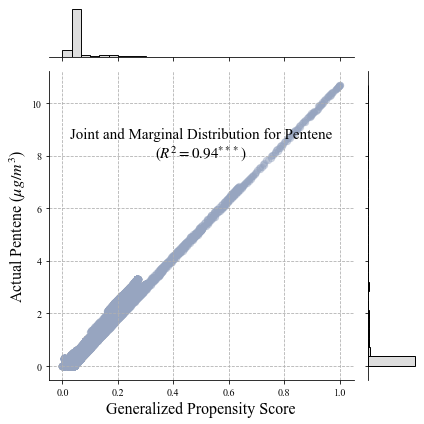

In [60]:
# Setting up custom aesthetics
scatter_color = "#97A5C0"
hist_color = "lightgray"
title_fontsize = 15
label_fontsize = 16
scatter_s = 40
scatter_alpha = 0.4

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

# Plotting each Tname vs gps_scores with enhanced aesthetics, R^2 calculation, and synchronized outlier removal
for tname, gps in gps_scores.items():
    plt.figure(figsize=(6, 6))
    if tname==Tname[0] or tname==Tname[1]:
        # Removing extreme values
        Q1 = np.percentile(gps, 0)
        Q3 = np.percentile(gps, 80)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mask = (gps > lower_bound) & (gps < upper_bound)
        filtered_gps = gps[mask]
        filtered_treatment = T_train[tname][mask]

    else:
        filtered_gps = gps
        filtered_treatment = T_train[tname]

     # Apply MinMax normalization to filtered_gps
    filtered_gps = MinMaxScaler().fit_transform(filtered_gps.values.reshape(-1, 1)).ravel()



    # Calculate R^2 value using sklearn
    R2 = r2_score(gps, T_train[tname])

    # Linear regression to estimate the significance of R^2
    X = sm.add_constant(filtered_gps)  # adding a constant for the intercept term
    model = sm.OLS(gps, T_train[tname]).fit()
    p_value = model.pvalues[0]  # p-value for the slope coefficient

    # Creating the jointplot with custom aesthetics
    g = sns.JointGrid(x=filtered_gps, y=filtered_treatment, space=0)
    g = g.plot_joint(plt.scatter, color=scatter_color, s=scatter_s, alpha=scatter_alpha)
    g = g.plot_marginals(sns.histplot, color=hist_color, bins=30, kde=False)

    # Adjust title inside the plot
    if p_value < 0.001:
        significance = "^{***}"
    elif p_value < 0.01:
        significance = "^{**}"
    elif p_value < 0.05:
        significance = "^{*}"
    else:
        significance = ""

    g.ax_joint.set_title(f"Joint and Marginal Distribution for {tname}\n($R^2 = {R2:.2f}{significance}$)", fontsize=title_fontsize, y=0.7)
    g.ax_joint.set_xlabel("Generalized Propensity Score", fontsize=label_fontsize)
    g.ax_joint.set_ylabel(f"Actual {tname} ($μg/m^3$)", fontsize=label_fontsize)
    g.ax_joint.grid(linestyle="--")

    plt.tight_layout()
    plt.savefig(f"GPS{tname}.svg", bbox_inches='tight')

    plt.show()